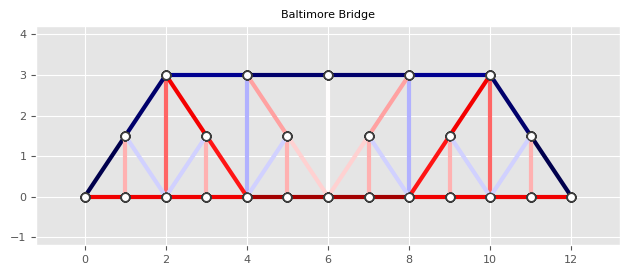

In [1]:
import numpy as np
from plane_trusses import analysis
from analisis_cerchas import *
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para la visualización

nodes = np.array([
    [0.0, 0.0],    # Nodo 0: Soporte izquierdo
    [2.0, 0.0],    # Nodo 1
    [4.0, 0.0],    # Nodo 2
    [6.0, 0.0],    # Nodo 3
    [8.0, 0.0],    # Nodo 4
    [10.0, 0.0],   # Nodo 5
    [12.0, 0.0],   # Nodo 6: Soporte derecho
    [2.0, 3.0],    # Nodo 7: Nodo superior entre 0 y 1
    [4.0, 3.0],    # Nodo 8: Nodo superior entre 1 y 2
    [6.0, 3.0],    # Nodo 9: Nodo superior entre 2 y 3
    [8.0, 3.0],    # Nodo 10: Nodo superior entre 3 y 4
    [10.0, 3.0],   # Nodo 11: Nodo superior entre 4 y 5

    [1.0, 0.0],    # Nodo 12: Nodo inferior entre 0 y 1
    [3.0, 0.0],    # Nodo 13: Nodo inferior entre 1 y 2
    [5.0, 0.0],   # Nodo 14: Nodo inferior entre 2 y 3
    [7.0, 0.0],  # Nodo 15: Nodo inferior entre 3 y 4
    [9.0, 0.0],  # Nodo 16: Nodo inferior entre 4 y 5
    [11.0, 0.0], # Nodo 17: Nodo inferior entre 5 y 6  

    [1.0, 1.5],   # Nodo 18: Nodo superior entre 0 y 12
    [3.0, 1.5],  # Nodo 19: Nodo superior entre 12 y 1
    [5.0, 1.5], # Nodo 20: Nodo superior entre 1 y 13
    [7.0, 1.5], # Nodo 21: Nodo superior entre 13 y 2
    [9.0, 1.5], # Nodo 22: Nodo superior entre 2 y 14
    [11.0, 1.5], # Nodo 23: Nodo superior entre 14 y 3
])

# Definir restricciones (0 = libre, -1 = fijo en esa dirección)
# [x_constraint, y_constraint] para cada nodo
cons = np.array([
    [-1, -1],    # Nodo 0: Fijo en x e y (Soporte izquierdo)
    [0, 0],      # Nodo 1: Libre
    [0, 0],      # Nodo 2: Libre
    [0, 0],      # Nodo 3: Libre
    [0, 0],      # Nodo 4: Libre
    [0, 0],      # Nodo 5: Libre    
    [0, -1],     # Nodo 6: Fijo en x e y (Soporte derecho)
    [0, 0],      # Nodo 7: Libre
    [0, 0],      # Nodo 8: Libre
    [0, 0],      # Nodo 9: Libre
    [0, 0],      # Nodo 10: Libre
    [0, 0],      # Nodo 11: Libre
    [0, 0],      # Nodo 12: Libre
    [0, 0],      # Nodo 13: Libre
    [0, 0],      # Nodo 14: Libre
    [0, 0],      # Nodo 15: Libre
    [0, 0],      # Nodo 16: Libre
    [0, 0],      # Nodo 17: Libre
    [0, 0],      # Nodo 18: Libre
    [0, 0],      # Nodo 19: Libre
    [0, 0],      # Nodo 20: Libre
    [0, 0],      # Nodo 21: Libre
    [0, 0],      # Nodo 22: Libre
    [0, 0],      # Nodo 23: Libre
], dtype=int)

# Definir elementos (conectividad e índice de propiedades del material)
# [material_index, start_node, end_node]
elements = np.array([
    # Chord inferior (entre nodos inferiores)
    [0, 0, 12],  # Entre Nodo 0 y Nodo 1
    [0, 12, 1],
    [0, 1, 13],  # Entre Nodo 1 y Nodo 2
    [0, 13, 2],
    [0, 2, 14],  # Entre Nodo 2 y Nodo 3
    [0, 14, 3],
    [0, 3, 15],  # Entre Nodo 3 y Nodo 4
    [0, 15, 4],
    [0, 4, 16],  # Entre Nodo 4 y Nodo 5
    [0, 16, 5],
    [0, 5, 17],  # Entre Nodo 5 y Nodo 6
    [0, 17, 6],

    # Chord superior (entre nodos superiores)
    [0, 7, 8],  # Entre Nodo 7 y Nodo 8
    [0, 8, 9],  # Entre Nodo 8 y Nodo 9
    [0, 9, 10], # Entre Nodo 9 y Nodo 10
    [0, 10, 11],# Entre Nodo 10 y Nodo 11

    # Montantes verticales (conectan nodos superiores con los inferiores)
    [0, 1, 7],  # Montante entre Nodo 1 y Nodo 7
    [0, 2, 8],  # Montante entre Nodo 2 y Nodo 8
    [0, 3, 9],  # Montante entre Nodo 3 y Nodo 9
    [0, 4, 10], # Montante entre Nodo 4 y Nodo 10
    [0, 5, 11], # Montante entre Nodo 5 y Nodo 11

    # Diagonales del tipo Pratt (diagonales hacia el centro del puente)
    [0, 0, 18],   
    [0, 18, 7],
    [0, 7, 19],  
    [0, 19, 2],
    [0, 8, 20],   
    [0, 20, 3],
    [0, 3, 21],  
    [0, 21, 10],
    [0, 4, 22],  
    [0, 22, 11],
    [0, 11, 23],  
    [0, 23, 6], 

    [0, 12, 18],
    [0, 13, 19],
    [0, 14, 20],
    [0, 15, 21],
    [0, 16, 22],
    [0, 17, 23],

    [0, 1, 18],
    [0, 1, 19],
    [0, 2, 20],
    [0, 4, 21],
    [0, 5, 22],
    [0, 5, 23],
])

# Definir cargas (fuerzas aplicadas en cada nodo en direcciones x e y)
# [force_x, force_y] para cada nodo
loads = np.array([
    [0.0, 0.0],  # Nodo 0: Sin carga (soporte izquierdo)
    [0.0, -1.0e3], # Nodo 1: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -1.0e3], # Nodo 2: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -1.0e3], # Nodo 3: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -1.0e3], # Nodo 4: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -1.0e3], # Nodo 5: Carga aplicada hacia abajo (-1e3 N)
    [0.0, 0.0],  # Nodo 6: Sin carga (soporte derecho)
    [0.0, 0.0],  # Nodo 7: Sin carga (nodo superior)
    [0.0, 0.0],  # Nodo 8: Sin carga (nodo superior)
    [0.0, 0.0],  # Nodo 9: Sin carga (nodo superior)
    [0.0, 0.0],  # Nodo 10: Sin carga (nodo superior)
    [0.0, 0.0],   # Nodo 11: Sin carga (nodo superior)
    [0.0, -1.0e3],   # Nodo 12: Sin carga (nodo inferior)
    [0.0, -1.0e3],   # Nodo 13: Sin carga (nodo inferior)
    [0.0, -1.0e3],   # Nodo 14: Sin carga (nodo inferior)
    [0.0, -1.0e3],   # Nodo 15: Sin carga (nodo inferior)
    [0.0, -1.0e3],   # Nodo 16: Sin carga (nodo inferior)
    [0.0, -1.0e3],   # Nodo 17: Sin carga (nodo inferior)
    [0.0, 0.0],   # Nodo 18: Sin carga (nodo superior)
    [0.0, 0.0],   # Nodo 19: Sin carga (nodo superior)
    [0.0, 0.0],   # Nodo 20: Sin carga (nodo superior)
    [0.0, 0.0],   # Nodo 21: Sin carga (nodo superior)
    [0.0, 0.0],   # Nodo 22: Sin carga (nodo superior)
    [0.0, 0.0],   # Nodo 23: Sin carga (nodo superior)
])

# Definir materiales (módulo de Young y área de la sección transversal)
# [Young's modulus, cross-sectional area]
mats = np.array([
    [200e9, 0.01]  # Índice de material 0: Acero con E = 200 GPa y A = 0.01 m²
])

# Preparar el diccionario de datos como se espera en la función de análisis
data = {
    "nodes": nodes,
    "cons": cons,
    "elements": elements,
    "loads": loads,
    "mats": mats
}


# Realizar el análisis para obtener los desplazamientos
disp = analysis(data, verbose=False)
 
# # Calcular las fuerzas internas en los elementos
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)
 
# Visualizar los esfuerzos en la cercha
#plt.figure(figsize=(70 / 25.4, 2))
plt.title("Baltimore Bridge", fontsize=8) 
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)
plt.tight_layout()
plt.savefig("vis_esfuerzos/baltimore_bridge.pdf")
plt.show()